>


# <div style= "font-family: Cambria; font-weight:bold; letter-spacing: 0px; color:black; font-size:120%; text-align:left;padding:3.0px; background: #cceeff; border-bottom: 8px solid #004466" > TABLE OF CONTENTS<br><div>  
* [LIBRARY IMPORTS](#1)
* [LOAD DATA](#2)
* [Statastical Summary](#3)
* [Encoding](#4) 
* [EDA](#5)
* [Feature Scaling](#6) 
* [Splitting data](#7) 
* [Training and evalution of model](#8) 
* [Splitting data](#7)
* [Model comparison](#8) 
* [Conclusion](#9) 
   

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-mobile-dataset/Flipkart Mobile - 2.csv
/kaggle/input/flipkart-mobile-dataset/Flipkart EDA.pdf


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LIBRARY IMPORTS
</div>


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    LOAD DATA
</div>

In [3]:
df = pd.read_csv('/kaggle/input/flipkart-mobile-dataset/Flipkart Mobile - 2.csv')
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Handling missing data
</div>

In [5]:
df.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

In [6]:
df.shape

(430, 16)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Statastical Summary
</div>

In [7]:
numerical_summary = df.describe().transpose()
palette = sns.color_palette("viridis", as_cmap=True)
numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
ROM,430.000000,105.748837,63.164064,8.000000,64.000000,128.000000,128.000000,512.000000
RAM,430.000000,5.320930,2.182635,1.000000,4.000000,4.000000,6.000000,12.000000
display_size,430.000000,6.369767,0.369549,4.700000,6.300000,6.500000,6.500000,7.600000
num_rear_camera,430.000000,2.904651,0.952350,1.000000,2.000000,3.000000,4.000000,4.000000
num_front_camera,430.000000,1.044186,0.227280,1.000000,1.000000,1.000000,1.000000,3.000000
battery_capacity,430.000000,4529.397674,986.907252,1800.000000,4000.000000,4500.000000,5000.000000,7000.000000
ratings,430.000000,4.339302,0.151494,3.000000,4.300000,4.300000,4.400000,4.600000
num_of_ratings,430.000000,23567.944186,56096.277784,4.000000,745.000000,5197.500000,21089.250000,642373.000000
sales_price,430.000000,25433.234884,22471.926588,5742.000000,11999.000000,16989.500000,28999.000000,157999.000000
discount_percent,430.000000,0.108000,0.073432,0.010000,0.060000,0.090000,0.160000,0.440000


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Encoding
</div>

In [8]:
drop_col=['model','screen_size']
df.drop(drop_col,inplace=True,axis=1)
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,brand,base_color,processor
0,Apple,Black,Water
1,Apple,Red,Ceramic
2,Apple,Red,Water
3,Apple,Others,iOS
4,Apple,Red,Ceramic
...,...,...,...
425,Xiaomi,Black,Qualcomm
426,Xiaomi,Red,Qualcomm
427,Xiaomi,Others,Qualcomm
428,Xiaomi,Blue,Qualcomm


In [9]:
df[object_columns]

,brand,base_color,processor
0,Apple,Black,Water
1,Apple,Red,Ceramic
2,Apple,Red,Water
3,Apple,Others,iOS
4,Apple,Red,Ceramic
...,...,...,...
425,Xiaomi,Black,Qualcomm
426,Xiaomi,Red,Qualcomm
427,Xiaomi,Others,Qualcomm
428,Xiaomi,Blue,Qualcomm


In [10]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'brand':
['Apple' 'Poco' 'Realme' 'Samsung' 'Xiaomi']

Unique values in 'base_color':
['Black' 'Red' 'Others' 'Blue' 'White' 'Green' 'Purple' 'Yellow' 'Gold'
 'Bronze' 'Silver' 'Gray']

Unique values in 'processor':
['Water' 'Ceramic' 'iOS' 'MediaTek' 'Qualcomm' 'Others' 'Exynos']



# One-Hot encoding

In [11]:
df1 = pd.get_dummies(df, columns=object_columns)

In [12]:
df1.head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,...,base_color_Silver,base_color_White,base_color_Yellow,processor_Ceramic,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,...,False,False,False,False,False,False,False,False,True,False
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,...,False,False,False,True,False,False,False,False,False,False
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,...,False,False,False,False,False,False,False,False,True,False
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,...,False,False,False,False,False,False,False,False,False,True
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,...,False,False,False,True,False,False,False,False,False,False


In [13]:
df1.shape

(430, 35)

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    EDA
</div>

<Axes: >

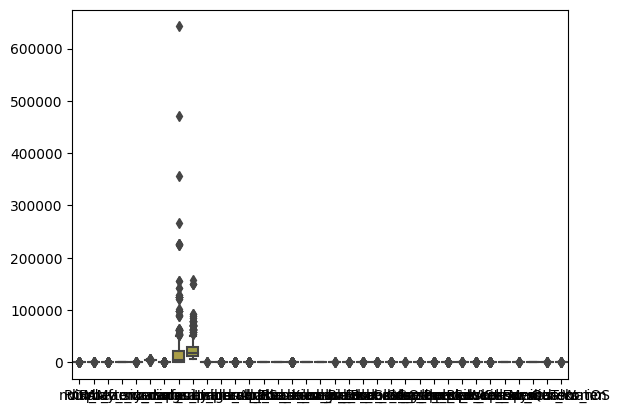

In [14]:
sns.boxplot(df1)

In [15]:
print(list(df1.columns))

['ROM', 'RAM', 'display_size', 'num_rear_camera', 'num_front_camera', 'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price', 'discount_percent', 'sales', 'brand_Apple', 'brand_Poco', 'brand_Realme', 'brand_Samsung', 'brand_Xiaomi', 'base_color_Black', 'base_color_Blue', 'base_color_Bronze', 'base_color_Gold', 'base_color_Gray', 'base_color_Green', 'base_color_Others', 'base_color_Purple', 'base_color_Red', 'base_color_Silver', 'base_color_White', 'base_color_Yellow', 'processor_Ceramic', 'processor_Exynos', 'processor_MediaTek', 'processor_Others', 'processor_Qualcomm', 'processor_Water', 'processor_iOS']


In [16]:
# import matplotlib.pyplot as plt
# import numpy as np
# non_boolean_numerical_features = ['ROM', 'RAM', 'display_size', 'num_rear_camera', 'num_front_camera', 'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price', 'discount_percent', 'sales', 'brand_Apple']
# # Get all boolean columns
# boolean_columns = df.select_dtypes(include=['bool']).columns.tolist()

# # Filter out non-boolean numerical features
# boolean_features_except_numerical = [col for col in boolean_columns if col not in non_boolean_numerical_features]
# # Visualize the distributions and box plots for numerical features, including log-transformed versions for skewed data
# for column in non_boolean_numerical_features:
#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

#     # Histogram for the distribution
#     sns.histplot(df1[column], kde=False, color='skyblue', ax=ax1)
#     ax1.set_title(f'Distribution of {column}')
#     ax1.set_ylabel('Frequency')

#     # Boxplot for the variable
#     sns.boxplot(x=df1[column], color='lightgreen', ax=ax2)
#     ax2.set_title(f'Boxplot of {column}')

#     # Log transformation and plot if the data is skewed
#     if df1[column].skew() > 1:
#         df1[column+'_log'] = np.log1p(df1[column])
#         sns.histplot(df1[column+'_log'], kde=False, color='orange', ax=ax3)
#         ax3.set_title(f'Log-transformed Distribution of {column}')
#     else:
#         ax3.set_title(f'Log-transformed plot not necessary for {column}')
#         ax3.axis('off')

#     plt.tight_layout()
#     plt.show()


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 15px;"> we can not consider these outlier for above feature. </h1>
</div>

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Feature Scaling
</div>

In [17]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['ROM', 'RAM', 'display_size', 'num_rear_camera', 'num_front_camera', 'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price', 'discount_percent', 'sales', 'brand_Apple']
scaler = MinMaxScaler()
df1[non_boolean_numerical_features] = scaler.fit_transform(df1[non_boolean_numerical_features])


In [18]:
df1

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,...,base_color_Silver,base_color_White,base_color_Yellow,processor_Ceramic,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS
0,0.111111,0.090909,0.000000,0.000000,0.0,0.000000,0.9375,0.060154,0.179020,0.372093,...,False,False,False,False,False,False,False,False,True,False
1,0.111111,0.272727,0.241379,0.333333,0.0,0.195192,0.9375,0.000374,0.337633,0.069767,...,False,False,False,True,False,False,False,False,False,False
2,0.111111,0.090909,0.000000,0.000000,0.0,0.000000,0.9375,0.060154,0.179020,0.372093,...,False,False,False,False,False,False,False,False,True,False
3,0.111111,0.181818,0.482759,0.000000,0.0,0.219615,1.0000,0.008347,0.244698,0.209302,...,False,False,False,False,False,False,False,False,False,True
4,0.238095,0.272727,0.482759,0.333333,0.0,0.195192,1.0000,0.001154,0.416447,0.023256,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.047619,0.181818,0.379310,0.333333,0.0,0.423077,0.8125,0.002905,0.014824,0.674419,...,False,False,False,False,False,False,False,True,False,False
426,0.111111,0.272727,0.379310,0.333333,0.0,0.423077,0.8125,0.002769,0.025989,0.627907,...,False,False,False,False,False,False,False,True,False,False
427,0.238095,0.454545,0.620690,0.666667,0.0,0.471154,0.7500,0.002413,0.106773,0.255814,...,False,False,False,False,False,False,False,True,False,False
428,0.047619,0.181818,0.517241,0.333333,0.0,0.615385,0.7500,0.012698,0.016794,0.139535,...,False,False,False,False,False,False,False,True,False,False


For regression tasks where the target variable is continuous, it's generally not necessary to scale the target variable. Algorithms like Linear Regression, Decision Trees, Random Forest, and Gradient Boosting Machines can handle continuous target variables without requiring scaling.

if you're using algorithms that are sensitive to the scale of the target variable, such as Support Vector Machines (SVM) with a regression (SVR) or NuSVR kernel, you might consider scaling the target variable

In [19]:
y_scaled = df1['sales_price']
y_scaled

0      0.179020
1      0.337633
2      0.179020
3      0.244698
4      0.416447
         ...   
425    0.014824
426    0.025989
427    0.106773
428    0.016794
429    0.016078
Name: sales_price, Length: 430, dtype: float64

In [20]:
df1

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,...,base_color_Silver,base_color_White,base_color_Yellow,processor_Ceramic,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS
0,0.111111,0.090909,0.000000,0.000000,0.0,0.000000,0.9375,0.060154,0.179020,0.372093,...,False,False,False,False,False,False,False,False,True,False
1,0.111111,0.272727,0.241379,0.333333,0.0,0.195192,0.9375,0.000374,0.337633,0.069767,...,False,False,False,True,False,False,False,False,False,False
2,0.111111,0.090909,0.000000,0.000000,0.0,0.000000,0.9375,0.060154,0.179020,0.372093,...,False,False,False,False,False,False,False,False,True,False
3,0.111111,0.181818,0.482759,0.000000,0.0,0.219615,1.0000,0.008347,0.244698,0.209302,...,False,False,False,False,False,False,False,False,False,True
4,0.238095,0.272727,0.482759,0.333333,0.0,0.195192,1.0000,0.001154,0.416447,0.023256,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.047619,0.181818,0.379310,0.333333,0.0,0.423077,0.8125,0.002905,0.014824,0.674419,...,False,False,False,False,False,False,False,True,False,False
426,0.111111,0.272727,0.379310,0.333333,0.0,0.423077,0.8125,0.002769,0.025989,0.627907,...,False,False,False,False,False,False,False,True,False,False
427,0.238095,0.454545,0.620690,0.666667,0.0,0.471154,0.7500,0.002413,0.106773,0.255814,...,False,False,False,False,False,False,False,True,False,False
428,0.047619,0.181818,0.517241,0.333333,0.0,0.615385,0.7500,0.012698,0.016794,0.139535,...,False,False,False,False,False,False,False,True,False,False


In [21]:
x = df1.drop(['sales_price'],axis=1)
x

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,discount_percent,sales,...,base_color_Silver,base_color_White,base_color_Yellow,processor_Ceramic,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS
0,0.111111,0.090909,0.000000,0.000000,0.0,0.000000,0.9375,0.060154,0.372093,0.231774,...,False,False,False,False,False,False,False,False,True,False
1,0.111111,0.272727,0.241379,0.333333,0.0,0.195192,0.9375,0.000374,0.069767,0.002526,...,False,False,False,True,False,False,False,False,False,False
2,0.111111,0.090909,0.000000,0.000000,0.0,0.000000,0.9375,0.060154,0.372093,0.231774,...,False,False,False,False,False,False,False,False,True,False
3,0.111111,0.181818,0.482759,0.000000,0.0,0.219615,1.0000,0.008347,0.209302,0.041931,...,False,False,False,False,False,False,False,False,False,True
4,0.238095,0.272727,0.482759,0.333333,0.0,0.195192,1.0000,0.001154,0.023256,0.009360,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0.047619,0.181818,0.379310,0.333333,0.0,0.423077,0.8125,0.002905,0.674419,0.002726,...,False,False,False,False,False,False,False,True,False,False
426,0.111111,0.272727,0.379310,0.333333,0.0,0.423077,0.8125,0.002769,0.627907,0.003144,...,False,False,False,False,False,False,False,True,False,False
427,0.238095,0.454545,0.620690,0.666667,0.0,0.471154,0.7500,0.002413,0.255814,0.006216,...,False,False,False,False,False,False,False,True,False,False
428,0.047619,0.181818,0.517241,0.333333,0.0,0.615385,0.7500,0.012698,0.139535,0.012305,...,False,False,False,False,False,False,False,True,False,False


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Splitting data
</div>

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [23]:
X_train

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,discount_percent,sales,...,base_color_Silver,base_color_White,base_color_Yellow,processor_Ceramic,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS
66,0.111111,0.272727,0.620690,0.666667,0.0,0.807692,0.8125,0.007290,0.162791,0.009379,...,False,False,False,False,False,False,False,True,False,False
132,0.238095,0.454545,0.620690,0.666667,0.0,0.615385,0.9375,0.001871,0.302326,0.003944,...,False,False,False,False,False,True,False,False,False,False
407,0.111111,0.272727,0.551724,0.333333,0.5,0.423077,0.9375,0.194611,0.255814,0.317890,...,False,False,False,False,False,False,False,True,False,False
31,0.238095,0.272727,0.241379,0.333333,0.0,0.195192,0.9375,0.000374,0.069767,0.002763,...,False,False,False,True,False,False,False,False,False,False
84,0.238095,0.454545,0.620690,0.666667,0.0,0.807692,0.8125,0.062078,0.279070,0.094222,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.238095,0.454545,0.689655,1.000000,0.0,0.646154,0.8750,0.015995,0.441860,0.035497,...,False,False,False,False,False,False,False,True,False,False
106,0.238095,0.454545,0.689655,1.000000,0.0,0.807692,0.8125,0.041640,0.418605,0.082662,...,False,False,False,False,False,False,False,True,False,False
270,0.238095,0.454545,0.586207,1.000000,0.0,0.807692,0.8125,0.007823,0.000000,0.016085,...,False,False,False,False,False,False,True,False,False,False
348,0.238095,0.636364,0.689655,1.000000,0.0,0.615385,0.8125,0.000190,0.348837,0.000800,...,False,False,False,False,False,False,False,True,False,False


In [24]:
y_train

66     0.034527
132    0.080502
407    0.054172
31     0.370472
84     0.047663
         ...   
71     0.087070
106    0.073934
270    0.077875
348    0.192155
102    0.037811
Name: sales_price, Length: 344, dtype: float64

<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Training and evalution of model
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> LinearRegression </h1>
</div>


In [25]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)



LinearRegression()

In [26]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)



In [27]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0034814160783976523
Testing MSE: 0.003312728738351629
Training R2 Score: 0.8480525036954734
Testing R2 Score: 0.8052864754653706


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> KNN </h1>
</div>

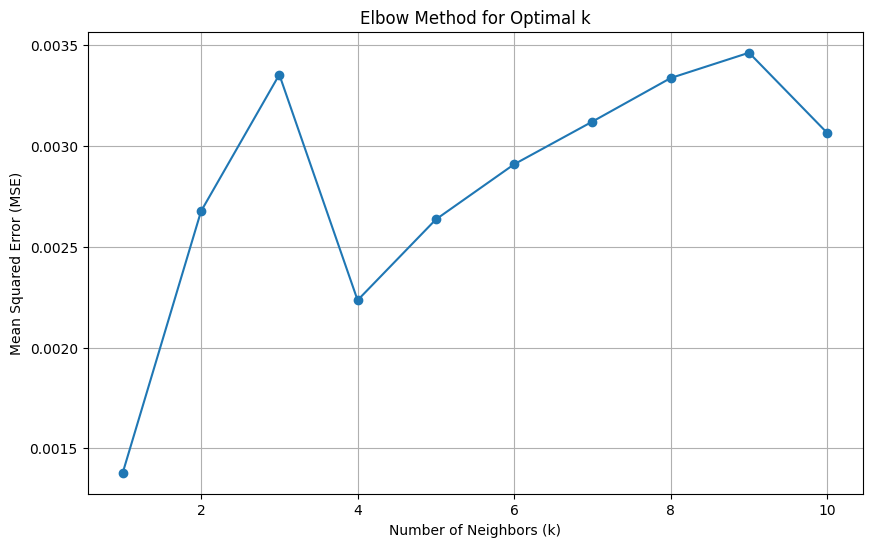

In [28]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()



In [29]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")



Optimal number of neighbors (k): 1


In [30]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)



KNeighborsRegressor(n_neighbors=1)

In [31]:
# Evaluate the model
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)



In [32]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0
Testing MSE: 0.0013790818470761255
Training R2 Score: 1.0
Testing R2 Score: 0.9189411786249863


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> DecisionTreeRegressor </h1>
</div>

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Decision Tree model with the best hyperparameters
best_dt_regressor = DecisionTreeRegressor(**best_params)
best_dt_regressor.fit(X_train, y_train)




Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=9, min_samples_split=5)

In [35]:
# Make predictions
y_pred_train = best_dt_regressor.predict(X_train)
y_pred_test = best_dt_regressor.predict(X_test)



In [36]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")



Training MSE: 0.00010525841649880338
Testing MSE: 0.0005502068858268022
Training R2 Score: 0.995405963409196
Testing R2 Score: 0.9676602793575344


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> RandomForestRegressor </h1>
</div>

In [37]:

from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)




Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [38]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(X_train, y_train)



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(n_estimators=300)

In [39]:
# Make predictions
y_pred_train = best_rf_regressor.predict(X_train)
y_pred_test = best_rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.00012132607883677307
Testing MSE: 0.00047730226524310697
Training R2 Score: 0.994704685248602
Testing R2 Score: 0.9719454221355618


<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 25px;"> XGBRegressor </h1>
</div>

In [40]:

from xgboost import XGBRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [41]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(X_train, y_train)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [42]:
# Make predictions
y_pred_train = best_xgb_regressor.predict(X_train)
y_pred_test = best_xgb_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")


Training MSE: 2.2269601899639586e-06
Testing MSE: 0.00021586810028167907
Training R2 Score: 0.9999028036242681
Testing R2 Score: 0.9873118380766198


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Model comparison
</div>

In [43]:

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df


,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,3.481416e-03,0.003313,0.848053,0.805286
1,Decision Tree,6.487417e-35,0.000509,1.000000,0.970071
2,Random Forest,1.346941e-04,0.000476,0.994121,0.972040
3,XGBoost,1.410904e-06,0.000427,0.999938,0.974921


<a id="1"></a>
<div style="font-family: Cambria; font-weight: bold; letter-spacing: 0px; color: #ffffff; font-size: 120%; text-align: left; padding: 3px; background-color: #0000ff; border-bottom: 10px solid #80ffff;">
    Conclusion
</div>

<div style="background-color: #ff0000; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 32px;">  IF you like this Notebook checkout below Dataset which has better features(columns) , good amount of data and also my work on differen mobile datasets </h1>
</div>


### Dataset link: https://www.kaggle.com/datasets/pruthvikmachhi/mobile-dataset-cleaned/data

### Notebook link 1: https://www.kaggle.com/code/pruthvikmachhi/smartphone-price-prediction

### Notebook link 2: https://www.kaggle.com/code/pruthvikmachhi/eda-data-cleaning-using-python

### Notebook link 3:https://www.kaggle.com/code/pruthvikmachhi/mobile-price-prediction-using-ml-dt-lr-rf-xgb

### Notebook link 4: https://www.kaggle.com/code/pruthvikmachhi/mobilephone-eda-price-prediction

<div style="background-color: #66bbf1; padding: 20px; border-radius: 10px;">
    <h1 style="text-align: left; font-size: 22px;">if you like my notebook give upvote , it will encourage me.
        thanks for exploring my notebook.</h1>
</div>